In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report
numGPUs = len(tf.config.experimental.list_physical_devices('GPU'))

print('Num GPUs Available: ', numGPUs)
maxEpoch=50
if numGPUs > 0:
    print(tf.test.gpu_device_name())
    print(device_lib.list_local_devices()[1].physical_device_desc)

2022-11-02 16:03:37.426973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 16:03:37.603878: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-02 16:03:38.286412: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/nate/miniconda3/lib/:/home/nate/miniconda3/lib/
2022-11-02 16:03:38.286477: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

Num GPUs Available:  0


2022-11-02 16:03:39.829600: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-11-02 16:03:39.829647: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: blade
2022-11-02 16:03:39.829655: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: blade
2022-11-02 16:03:39.829748: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-11-02 16:03:39.829773: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-11-02 16:03:39.829780: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1


In [3]:


cifarData = cifar10.load_data()

# 1st index: training [0] and testing [1] data and labels
# 2nd index: datapoints [0] and labels [1]
# 3rd index: image from the set (0-49999) for training and (0-9999) for testing
# 4th index: column of RGB triples for pixels in column (0-32)
# 5th index: RGB triple for each pixel in column (0-32)
# 6th index: R for pixel, G for pixel, B for pixel (0-2)

In [2]:
from sklearn.model_selection import train_test_split
# read in full CIFAR-10 dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# reshape into vectors

allX = np.concatenate((trainX, testX))
allY = np.concatenate((trainY, testY))
# scale the data to [0,1]


trainX, testX, trainY, testY = train_test_split(allX, allY, test_size=.4, random_state=1)
valX, testX, valY, testY, = train_test_split(testX, testY, test_size=.5, random_state=1)


trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
testX = testX.reshape((testX.shape[0], 32 * 32 * 3))
valX = valX.reshape((valX.shape[0], 32 * 32 * 3))

trainX = trainX/255.0
testX = testX/255.0
valX = valX/255.0

print(trainX.shape, " ", valX.shape, " ", testX.shape)
# convert the labels to one-hot form
trainY = to_categorical(trainY)
testY = to_categorical(testY)
valY = to_categorical(valY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#The data is first split in what will be training and validation, and testing.


(36000, 3072)   (12000, 3072)   (12000, 3072)


This is the code from Dr. Whites Github, currently uses 2 layers of relu, adam optimizer and no hyper parameters


the first normalzation attempt is just to divide the data by 255, this works because the min value is 0, so there is no need to subtract the minium value. The reason for doing this is to map the valeus between 0 and 1 so that relu and sigmoid work better

2022-11-02 13:37:42.653768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 13:37:42.654367: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 13:37:42.654871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 13:37:42.655415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 13:37:42.655844: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Epoch 1/50
  54/1125 [>.............................] - ETA: 3s - loss: 2.2797 - accuracy: 0.1753

2022-11-02 13:37:46.320755: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1117/1125 [============================>.] - ETA: 0s - loss: 1.9022 - accuracy: 0.3109

2022-11-02 13:37:49.624082: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 147456000 exceeds 10% of free system memory.
2022-11-02 13:37:49.819340: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 147456000 exceeds 10% of free system memory.


1125/1125 [==============================] - 7s 4ms/step - loss: 1.9017 - accuracy: 0.3110 - val_loss: 1.7665 - val_accuracy: 0.3664
Epoch 2/50
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7296 - accuracy: 0.3789 - val_loss: 1.6876 - val_accuracy: 0.3864
Epoch 3/50
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6436 - accuracy: 0.4097 - val_loss: 1.5853 - val_accuracy: 0.4304
Epoch 4/50
1125/1125 [==============================] - 4s 3ms/step - loss: 1.5897 - accuracy: 0.4314 - val_loss: 1.5778 - val_accuracy: 0.4305
Epoch 5/50
1125/1125 [==============================] - 4s 4ms/step - loss: 1.5522 - accuracy: 0.4461 - val_loss: 1.5861 - val_accuracy: 0.4339
Epoch 6/50
1125/1125 [==============================] - 4s 3ms/step - loss: 1.5235 - accuracy: 0.4559 - val_loss: 1.5214 - val_accuracy: 0.4533
Epoch 7/50
1125/1125 [==============================] - 4s 3ms/step - loss: 1.4948 - accuracy: 0.4674 - val_loss: 1.5358 - val_accuracy: 0.4497
Epo

2022-11-02 13:40:56.259012: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 147456000 exceeds 10% of free system memory.


375/375 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.51      0.62      0.56      1201
           1       0.61      0.57      0.59      1205
           2       0.35      0.28      0.31      1191
           3       0.32      0.35      0.33      1192
           4       0.36      0.54      0.43      1219
           5       0.47      0.23      0.31      1190
           6       0.52      0.53      0.52      1234
           7       0.59      0.46      0.52      1219
           8       0.54      0.70      0.61      1176
           9       0.55      0.49      0.52      1173

    accuracy                           0.48     12000
   macro avg       0.48      0.48      0.47     12000
weighted avg       0.48      0.48      0.47     12000



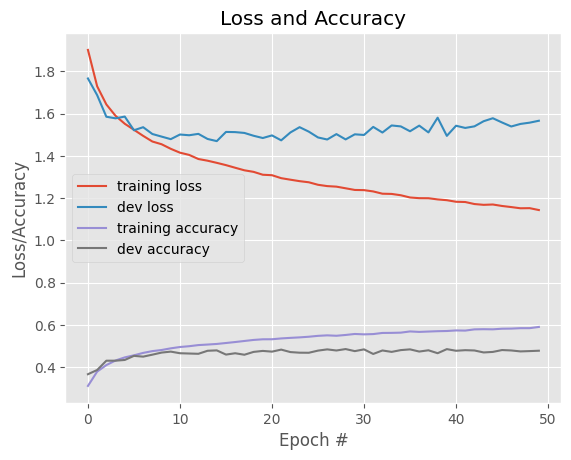

In [3]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (3072,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Okay so this is what im going to call the base method, as it can bee seen it is not all that great. there is a bit of overfitting but even without that the data just is not that accurate.

Here I am going to attempt to normalize the data. The method is going to be the same however this time instead of 0-1 I want to map from -1 - 1, the reason for this change is to see which of the two methods produce better results when using relu, as now we will get some zero derivative output. In order to better accomdate this I am going to use tanh activation function so that the values are not lost





In [6]:
from sklearn.model_selection import train_test_split
# read in full CIFAR-10 dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# reshape into vectors

allX = np.concatenate((trainX, testX))
allY = np.concatenate((trainY, testY))
# scale the data to [0,1]


trainX, testX, trainY, testY = train_test_split(allX, allY, test_size=.4, random_state=1)
valX, testX, valY, testY, = train_test_split(testX, testY, test_size=.5, random_state=1)


trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
testX = testX.reshape((testX.shape[0], 32 * 32 * 3))
valX = valX.reshape((valX.shape[0], 32 * 32 * 3))
print(trainX.max(), " ", trainX.min())
trainX = ((trainX - trainX.min()) / (trainX.max()-trainX.min()) *2) -1
testX = ((testX - testX.min()) / (testX.max()-testX.min()) *2) -1
valX = ((valX - valX.min()) / (valX.max()-valX.min()) *2) -1

print(trainX.shape, " ", valX.shape, " ", testX.shape)
print(trainX.max(), " ", trainX.min())
# convert the labels to one-hot form
trainY = to_categorical(trainY)
testY = to_categorical(testY)
valY = to_categorical(valY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#The data is first split in what will be training and validation, and testing.


255   0
(36000, 3072)   (12000, 3072)   (12000, 3072)
1.0   -1.0


Test accuracy
375/375 [==============================] - 0s 884us/step
              precision    recall  f1-score   support

           0       0.48      0.52      0.50      1201
           1       0.53      0.54      0.54      1205
           2       0.31      0.31      0.31      1191
           3       0.29      0.30      0.29      1192
           4       0.40      0.41      0.40      1219
           5       0.35      0.35      0.35      1190
           6       0.46      0.51      0.48      1234
           7       0.55      0.44      0.49      1219
           8       0.57      0.60      0.59      1176
           9       0.50      0.44      0.47      1173

    accuracy                           0.44     12000
   macro avg       0.44      0.44      0.44     12000
weighted avg       0.44      0.44      0.44     12000



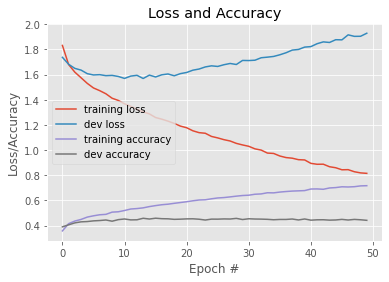

In [7]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape = (3072,), activation = 'tanh'))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose=0)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

objectivly this was a mistake, using the range of -1 - 1 does not seem to give desirable results, even with the tanh activation fucntion. I will go back to trying with the values ranging from 0-1

In [8]:
from sklearn.model_selection import train_test_split
# read in full CIFAR-10 dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# reshape into vectors

allX = np.concatenate((trainX, testX))
allY = np.concatenate((trainY, testY))
# scale the data to [0,1]


trainX, testX, trainY, testY = train_test_split(allX, allY, test_size=.4, random_state=1)
valX, testX, valY, testY, = train_test_split(testX, testY, test_size=.5, random_state=1)


trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
testX = testX.reshape((testX.shape[0], 32 * 32 * 3))
valX = valX.reshape((valX.shape[0], 32 * 32 * 3))

trainX = trainX/255.0
testX = testX/255.0
valX = valX/255.0

print(trainX.shape, " ", valX.shape, " ", testX.shape)
# convert the labels to one-hot form
trainY = to_categorical(trainY)
testY = to_categorical(testY)
valY = to_categorical(valY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#The data is first split in what will be training and validation, and testing.


(36000, 3072)   (12000, 3072)   (12000, 3072)


Next I am going to run the He normalization method because this method is supposed to work best with relu, which is the activatin function that is currently being tuned

Test accuracy
375/375 [==============================] - 0s 897us/step
              precision    recall  f1-score   support

           0       0.62      0.52      0.57      1201
           1       0.63      0.56      0.59      1205
           2       0.36      0.33      0.34      1191
           3       0.30      0.36      0.33      1192
           4       0.40      0.46      0.43      1219
           5       0.38      0.33      0.36      1190
           6       0.53      0.52      0.52      1234
           7       0.54      0.57      0.55      1219
           8       0.64      0.62      0.63      1176
           9       0.53      0.58      0.56      1173

    accuracy                           0.49     12000
   macro avg       0.49      0.49      0.49     12000
weighted avg       0.49      0.49      0.49     12000



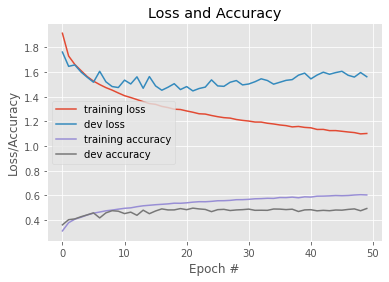

In [9]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
initializer = tf.keras.initializers.HeUniform(seed=1234)
model.add(Dense(256, input_shape = (3072,), activation = 'relu', kernel_initializer=initializer))
model.add(Dense(128, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose=0)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

alright this appears to have had little to no impact fromt the previous set. Thats okay, the issue is still over fitting so sticking with the relu activation does not seem to be the best option. However I am going to try using the glorate normoral or the xavier funtion. Thi fucntion will take into account the difference between the number of input and outputs taht the network has which will hopefully make things a little bit better.

Test accuracy
375/375 [==============================] - 0s 950us/step
              precision    recall  f1-score   support

           0       0.63      0.45      0.53      1201
           1       0.56      0.62      0.59      1205
           2       0.35      0.37      0.36      1191
           3       0.34      0.28      0.31      1192
           4       0.42      0.42      0.42      1219
           5       0.38      0.30      0.33      1190
           6       0.46      0.64      0.54      1234
           7       0.58      0.54      0.56      1219
           8       0.59      0.65      0.62      1176
           9       0.53      0.57      0.55      1173

    accuracy                           0.48     12000
   macro avg       0.48      0.48      0.48     12000
weighted avg       0.48      0.48      0.48     12000



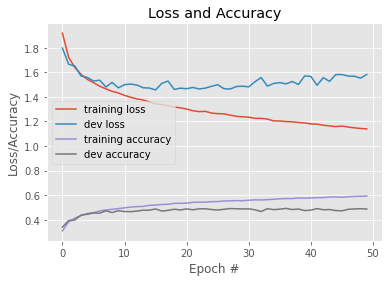

In [10]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
initializer = tf.keras.initializers.GlorotNormal(seed=1)
model.add(Dense(256, input_shape = (3072,), activation = 'relu', kernel_initializer=initializer))
model.add(Dense(128, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose=0)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

again there is next to no change in the data itself. For my next approach I am going to try a constant value inilization of 0.5, the reason I am chosing this value is because the data has been normalized to be between 0 and 1, so this should be the most neutral point. 

Test accuracy
375/375 [==============================] - 0s 874us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1201
           1       0.00      0.00      0.00      1205
           2       0.00      0.00      0.00      1191
           3       0.10      1.00      0.18      1192
           4       0.00      0.00      0.00      1219
           5       0.00      0.00      0.00      1190
           6       0.00      0.00      0.00      1234
           7       0.00      0.00      0.00      1219
           8       0.00      0.00      0.00      1176
           9       0.00      0.00      0.00      1173

    accuracy                           0.10     12000
   macro avg       0.01      0.10      0.02     12000
weighted avg       0.01      0.10      0.02     12000



/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


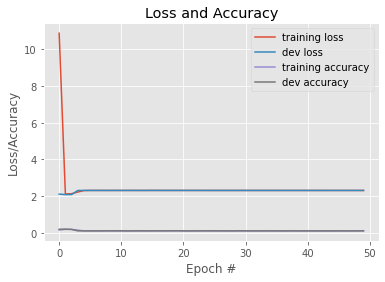

In [11]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
initializer = tf.keras.initializers.Constant(0.05)
model.add(Dense(256, input_shape = (3072,), activation = 'relu', kernel_initializer=initializer))
model.add(Dense(128, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose=0)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Okay this is has been the worst run yet. Picking a middle of the road value seems be not be a good idea. I imagine this is because the data that is going to be feed in is not uniform at all. This would cause a uniform starting point to gover over rather poorly

The next part I am going to play with are some sigmoids, first run I am goign to keep it normal, overall I have not been too impressed with the relu, and the tanh. While the relu seemed to be better than the tanh, I think that sigmoid is gonna be 

Test accuracy
375/375 [==============================] - 0s 906us/step
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      1201
           1       0.62      0.46      0.53      1205
           2       0.30      0.48      0.37      1191
           3       0.31      0.29      0.30      1192
           4       0.50      0.26      0.34      1219
           5       0.40      0.26      0.32      1190
           6       0.51      0.46      0.48      1234
           7       0.44      0.59      0.51      1219
           8       0.61      0.58      0.60      1176
           9       0.44      0.59      0.50      1173

    accuracy                           0.45     12000
   macro avg       0.46      0.45      0.45     12000
weighted avg       0.46      0.45      0.45     12000



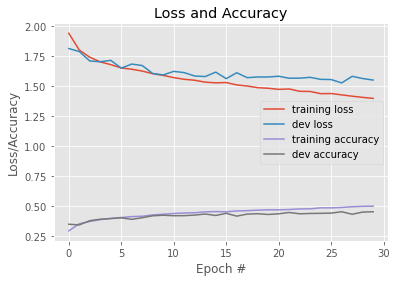

In [12]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (3072,), activation = 'sigmoid'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =0 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

For the next part I am going to add another lay, while this will not help with the overfitting issue, It might bring the overall accuracy up. I am also going to step the number of nodes down by two, this is to see if this will allow the changes to be less jaring

Test accuracy
375/375 [==============================] - 0s 974us/step
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      1201
           1       0.51      0.53      0.52      1205
           2       0.32      0.26      0.29      1191
           3       0.30      0.17      0.21      1192
           4       0.49      0.19      0.27      1219
           5       0.32      0.43      0.37      1190
           6       0.40      0.60      0.48      1234
           7       0.45      0.57      0.50      1219
           8       0.59      0.59      0.59      1176
           9       0.43      0.52      0.47      1173

    accuracy                           0.43     12000
   macro avg       0.43      0.43      0.42     12000
weighted avg       0.43      0.43      0.42     12000



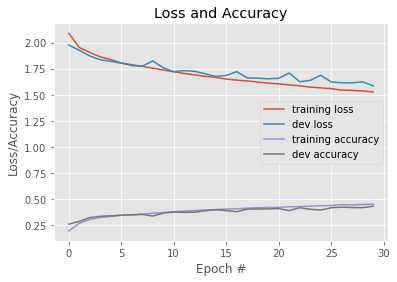

In [13]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (3072,), activation = 'sigmoid'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dense(32, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =0 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

While this did not fix the overfitting it is a step closer to what we want, however, it seems that our overall accuracy has gone down considerably. Next I am going to try 3 layers instead of 5 with a relu implentation. The relu seems to work better for this assignment over all. This model with use a uniform random to set the intital wegiths between the values of 0 and 1 so that the relu has the best chance of being good. the density of the hidden layers are 256, for the colors and then 2 lays of 128

Test accuracy
375/375 [==============================] - 0s 915us/step
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      1201
           1       0.51      0.65      0.57      1205
           2       0.40      0.25      0.31      1191
           3       0.29      0.28      0.28      1192
           4       0.40      0.38      0.39      1219
           5       0.39      0.35      0.37      1190
           6       0.44      0.62      0.51      1234
           7       0.61      0.50      0.55      1219
           8       0.53      0.72      0.61      1176
           9       0.56      0.44      0.49      1173

    accuracy                           0.47     12000
   macro avg       0.47      0.47      0.47     12000
weighted avg       0.47      0.47      0.47     12000



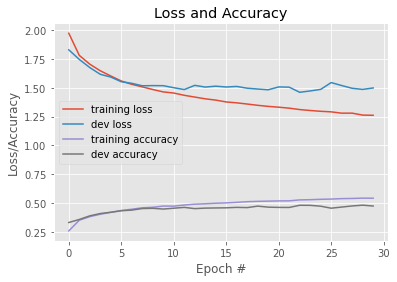

In [14]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
initializer = tf.keras.initializers.random_uniform(-0.02, 0.02, seed=1)
model.add(Dense(256, input_shape = (3072,), activation = 'relu', kernel_initializer=initializer))
model.add(Dense(128, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(128, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose=0)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

This again had little to no effect on the data, next I am going to try a desner matrix, while this may increase the overfitting, it should not really fix anything as over fitting is the main issue that we are dealing with at the moment.

Test accuracy
375/375 [==============================] - 0s 975us/step
              precision    recall  f1-score   support

           0       0.52      0.62      0.57      1201
           1       0.60      0.60      0.60      1205
           2       0.40      0.28      0.33      1191
           3       0.32      0.39      0.35      1192
           4       0.45      0.38      0.42      1219
           5       0.40      0.26      0.31      1190
           6       0.45      0.64      0.53      1234
           7       0.54      0.54      0.54      1219
           8       0.62      0.63      0.62      1176
           9       0.55      0.52      0.53      1173

    accuracy                           0.49     12000
   macro avg       0.49      0.49      0.48     12000
weighted avg       0.49      0.49      0.48     12000



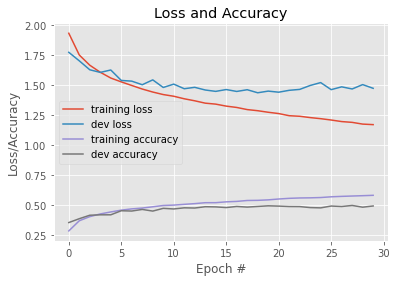

In [15]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
initializer = tf.keras.initializers.random_uniform(-0.02, 0.02, seed=1)
model.add(Dense(512, input_shape = (3072,), activation = 'relu', kernel_initializer=initializer))
model.add(Dense(256, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(128, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose=0)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

As expected the data not only got a little bit less accurate, the amount of overfitting also got considerable worse.

Now I am going to run the sigmoid version with sum of squares errors as that is what the sigmoid should work the best with


Test accuracy
375/375 [==============================] - 0s 972us/step
              precision    recall  f1-score   support

           0       0.46      0.56      0.51      1201
           1       0.52      0.57      0.55      1205
           2       0.33      0.19      0.24      1191
           3       0.26      0.37      0.30      1192
           4       0.38      0.37      0.38      1219
           5       0.28      0.41      0.33      1190
           6       0.52      0.29      0.37      1234
           7       0.50      0.46      0.48      1219
           8       0.60      0.52      0.55      1176
           9       0.50      0.48      0.49      1173

    accuracy                           0.42     12000
   macro avg       0.44      0.42      0.42     12000
weighted avg       0.44      0.42      0.42     12000



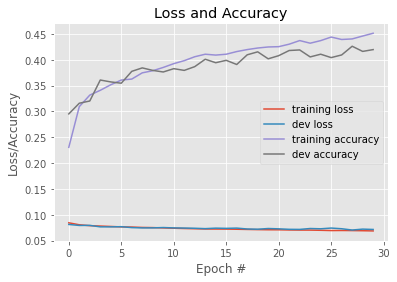

In [16]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
initializer = tf.keras.initializers.random_uniform(-0.02, 0.02, seed=1)
model.add(Dense(512, input_shape = (3072,), activation = 'sigmoid', kernel_initializer=initializer))
model.add(Dense(256, activation = 'sigmoid', kernel_initializer=initializer))
model.add(Dense(128, activation = 'sigmoid', kernel_initializer=initializer))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose=0)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Thoughts, It still seems that relu is the best for this type fo problem, sigmoid's activation function just does not seem to have a very good time with any of these attemps. Next up I will be expiramenting with l1 and l2 regularzation. these methods should help to greatly reduce that over fitting problem that has been a recurring theme throughout this assingment. We will start with a small value and see how things go from there

Test accuracy
375/375 [==============================] - 0s 877us/step
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1201
           1       0.61      0.53      0.57      1205
           2       0.35      0.24      0.28      1191
           3       0.30      0.31      0.30      1192
           4       0.45      0.28      0.35      1219
           5       0.43      0.26      0.33      1190
           6       0.38      0.72      0.50      1234
           7       0.59      0.45      0.51      1219
           8       0.45      0.79      0.57      1176
           9       0.58      0.45      0.51      1173

    accuracy                           0.45     12000
   macro avg       0.46      0.45      0.44     12000
weighted avg       0.46      0.45      0.44     12000



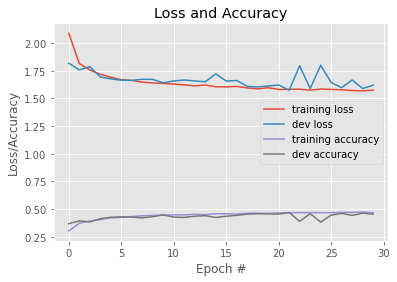

In [17]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (3072,), activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.001)))
model.add(Dense(128, activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =0 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

This last run while reducing the accuracy dramatically improved the over fitting as a result I am going to try with a smaller l2 value to see if i can smooth the curve even more.

Test accuracy
375/375 [==============================] - 0s 881us/step
              precision    recall  f1-score   support

           0       0.59      0.48      0.53      1201
           1       0.69      0.46      0.56      1205
           2       0.34      0.30      0.32      1191
           3       0.33      0.27      0.30      1192
           4       0.36      0.52      0.43      1219
           5       0.41      0.29      0.34      1190
           6       0.44      0.64      0.52      1234
           7       0.51      0.53      0.52      1219
           8       0.62      0.65      0.63      1176
           9       0.51      0.60      0.55      1173

    accuracy                           0.47     12000
   macro avg       0.48      0.47      0.47     12000
weighted avg       0.48      0.47      0.47     12000



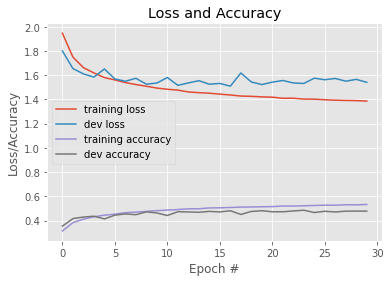

In [18]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (3072,), activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.000, l2 = 0.0001)))
model.add(Dense(128, activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =0 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

While this improved the accuracy, we are once again overfitting out data, so the next attemp will bring the l2 back down, and instead we will start with a small l1 value to see if its ossible that some of the dat points are not needed

Test accuracy
375/375 [==============================] - 0s 874us/step
              precision    recall  f1-score   support

           0       0.58      0.43      0.49      1201
           1       0.47      0.59      0.52      1205
           2       0.35      0.22      0.27      1191
           3       0.26      0.30      0.28      1192
           4       0.42      0.37      0.39      1219
           5       0.36      0.39      0.38      1190
           6       0.42      0.54      0.47      1234
           7       0.49      0.48      0.48      1219
           8       0.59      0.52      0.55      1176
           9       0.45      0.51      0.48      1173

    accuracy                           0.43     12000
   macro avg       0.44      0.43      0.43     12000
weighted avg       0.44      0.43      0.43     12000



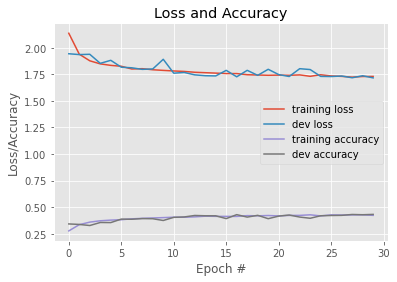

In [19]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
initializer = tf.keras.initializers.random_uniform(-0.02, 0.02, seed=1)
model.add(Dense(256, input_shape = (3072,), activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.0001, l2 = 0.001),kernel_initializer=initializer))
model.add(Dense(128, activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.0001, l2 = 0.001),kernel_initializer=initializer))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =0 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright from these tests it can be seen that l1 seems to make things worse, while low l2 seems to make the fitting much better, now I am going to combine this with the he normalization fucntion to see if the result is anybetter. Added l1 is not a good idea, I think this is because different colored pixels are need for everything and thus all demensions are important to have. Now that we have a pretty good baseline for fixing the over fittig lets try to bring the accuracy up by using the he weight initilaztion method that works well with relu.

Test accuracy
375/375 [==============================] - 0s 893us/step
              precision    recall  f1-score   support

           0       0.71      0.50      0.59      1201
           1       0.57      0.66      0.61      1205
           2       0.41      0.32      0.36      1191
           3       0.37      0.24      0.29      1192
           4       0.46      0.49      0.47      1219
           5       0.45      0.28      0.35      1190
           6       0.46      0.70      0.56      1234
           7       0.57      0.60      0.59      1219
           8       0.71      0.62      0.66      1176
           9       0.46      0.72      0.56      1173

    accuracy                           0.51     12000
   macro avg       0.52      0.51      0.50     12000
weighted avg       0.52      0.51      0.50     12000



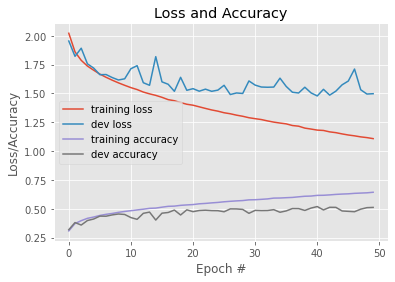

In [29]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
initializer=tf.keras.initializers.HeUniform(seed=1234)
model.add(Dense(256, input_shape = (3072,), activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.000000, l2 = 0.0001), kernel_initializer=initializer))
model.add(Dense(128, activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.000000, l2 = 0.0001), kernel_initializer=initializer))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch = 50
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 64, verbose =0 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Woot we have finally break the 50 barrier
Now we have more over fitting to deal with, as seen before messing with l2 will yeild diminishing returns so next up is to use dropout.
This will allow nodes that are not helpful to be temporily droped such that the overfitting of the data can be avoided.

Test accuracy
375/375 [==============================] - 0s 928us/step
              precision    recall  f1-score   support

           0       0.52      0.64      0.57      1150
           1       0.59      0.71      0.64      1240
           2       0.41      0.26      0.32      1198
           3       0.40      0.30      0.35      1213
           4       0.38      0.53      0.45      1197
           5       0.46      0.35      0.40      1215
           6       0.56      0.49      0.52      1177
           7       0.51      0.65      0.57      1247
           8       0.66      0.66      0.66      1192
           9       0.59      0.50      0.55      1171

    accuracy                           0.51     12000
   macro avg       0.51      0.51      0.50     12000
weighted avg       0.51      0.51      0.50     12000



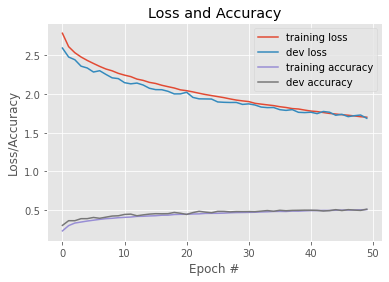

In [4]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
initializer=tf.keras.initializers.HeUniform(seed=1234)
model.add(Dense(256, input_shape = (3072,), activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.000000, l2 = 0.0009), kernel_initializer=initializer))
model.add(Dropout(.3))
model.add(Dense(128, activation = 'relu',kernel_regularizer = l1_l2(l1 = 0.000000, l2 = 0.0009), kernel_initializer=initializer))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch = 50
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 64, verbose =0 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Test accuracy
375/375 [==============================] - 0s 900us/step
              precision    recall  f1-score   support

           0       0.53      0.63      0.57      1201
           1       0.56      0.69      0.62      1205
           2       0.42      0.25      0.31      1191
           3       0.37      0.27      0.31      1192
           4       0.39      0.55      0.45      1219
           5       0.44      0.34      0.38      1190
           6       0.59      0.53      0.56      1234
           7       0.51      0.65      0.57      1219
           8       0.64      0.65      0.64      1176
           9       0.60      0.51      0.55      1173

    accuracy                           0.51     12000
   macro avg       0.50      0.51      0.50     12000
weighted avg       0.50      0.51      0.50     12000



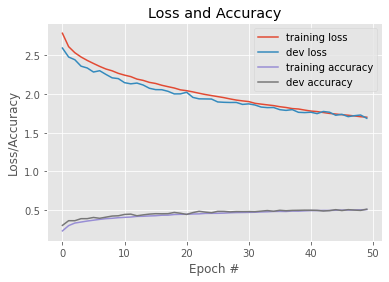

In [5]:
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

As we can see from the results of the data, the dropout's reduced the overfitting to close to nothing while maintaining a accuracy of 51% Because of the limitations of this type of network, I do not beielve that there is a much better posssibility out there. While there may be some better way to train or test the data, I think the only way to get signifgant resutls would be to start using a Concultional Neural Network. While I realize now that the other part of the hw was done with the testing data, the final run that has the best result is tested on both validation and testing. The results are the same which means that this model is well trained to preform to the spefication indicated by the validation data.